In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

In [82]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [83]:
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [84]:
df=df[~df.duplicated()]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [85]:
def conv(obj):
    if obj=='ham':
        return 0
    elif obj=='spam':
        return 1

In [86]:
df.v1=df.v1.apply(conv)

C:\Users\shubh\AppData\Local\Temp\ipykernel_6672\3444941680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.v1=df.v1.apply(conv)


In [87]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_6672\197907457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [88]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


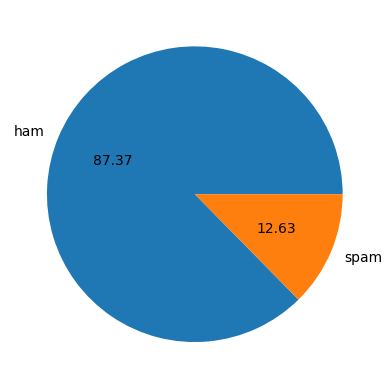

In [89]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [90]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
df['num_characters'] = df.text.apply(len)

C:\Users\shubh\AppData\Local\Temp\ipykernel_6672\1031772955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df.text.apply(len)


In [93]:
df['text'][3]

'U dun say so early hor... U c already then say...'

In [94]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [95]:
df['num_words']=df.text.apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\shubh\AppData\Local\Temp\ipykernel_6672\2247315455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df.text.apply(lambda x:len(nltk.word_tokenize(x)))


In [96]:
df['num_sentences']=df.text.apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\shubh\AppData\Local\Temp\ipykernel_6672\1990010652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df.text.apply(lambda x:len(nltk.sent_tokenize(x)))


In [97]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


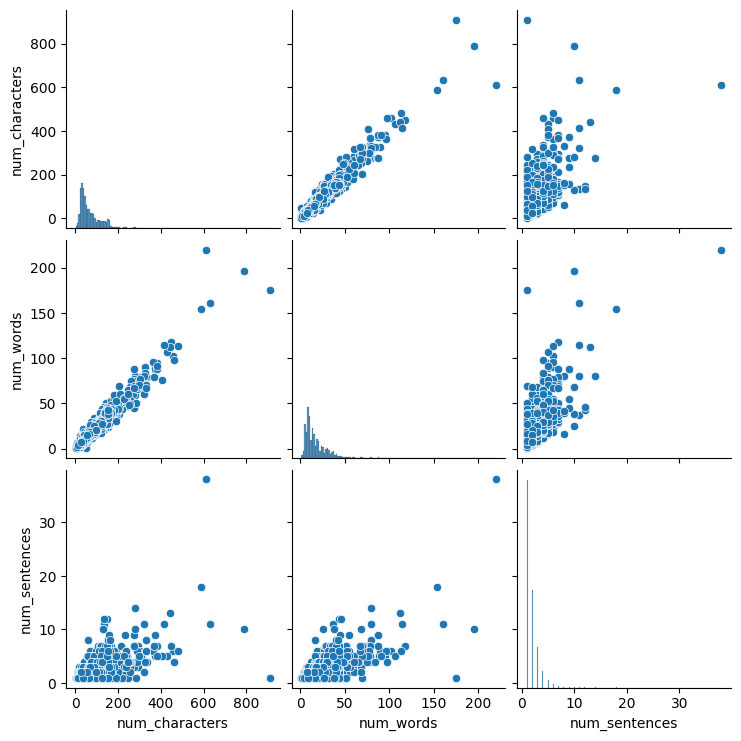

In [98]:
sns.pairplot(df[df['target']==0][['num_characters','num_words','num_sentences']])

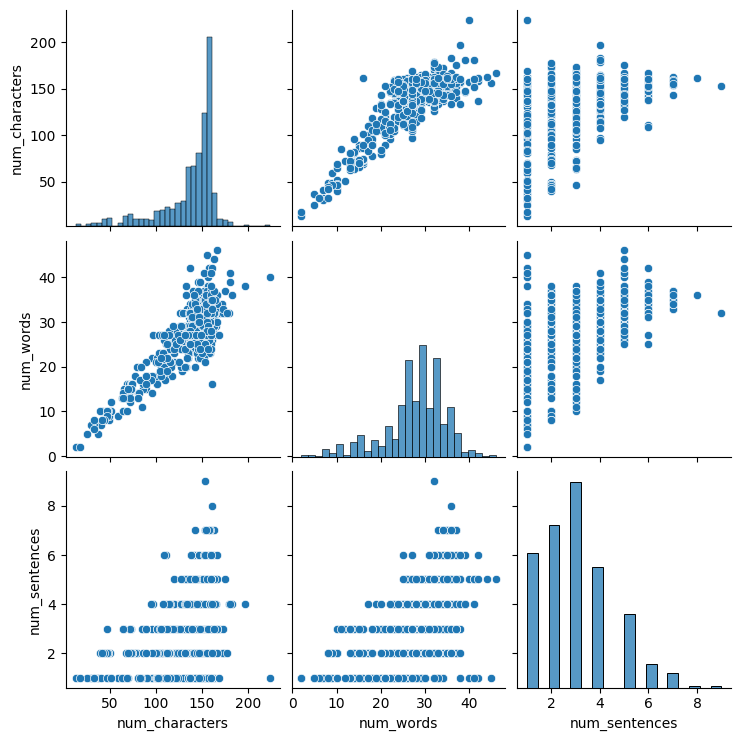

In [99]:
sns.pairplot(df[df['target']==1][['num_characters','num_words','num_sentences']])

In [100]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

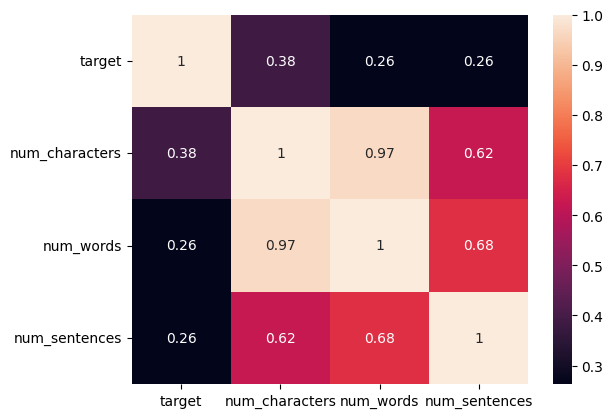

In [101]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

<Axes: >

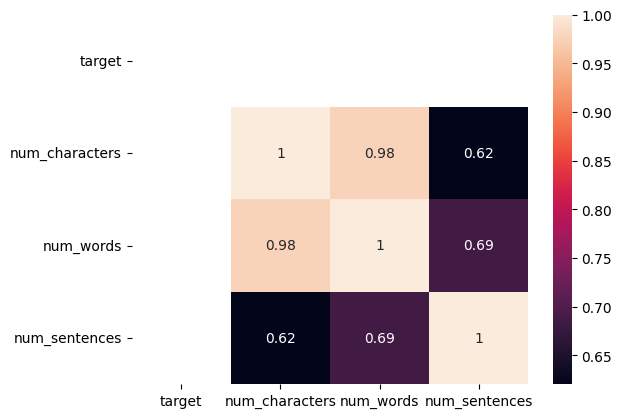

In [102]:
sns.heatmap(df[df['target']==0][['target','num_characters','num_words','num_sentences']].corr(),annot=True)

<Axes: >

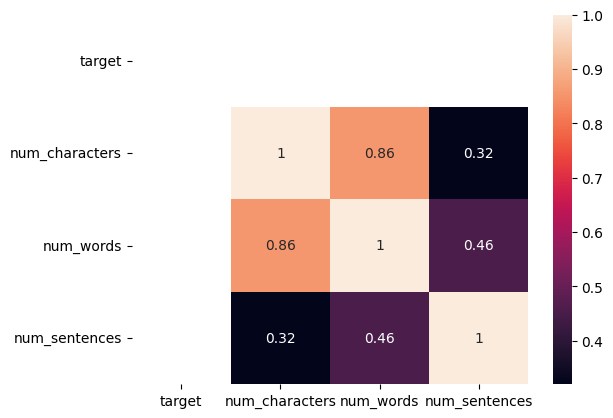

In [103]:
sns.heatmap(df[df['target']==1][['target','num_characters','num_words','num_sentences']].corr(),annot=True)

<Axes: xlabel='num_sentences', ylabel='Count'>

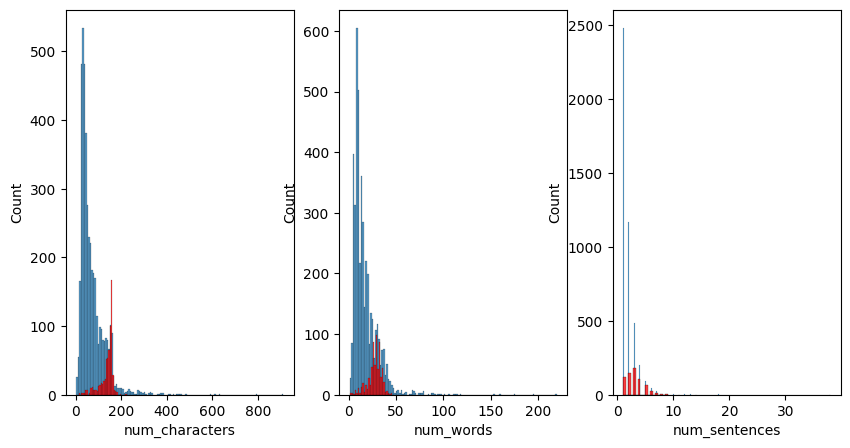

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.subplot(132)
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.subplot(133)
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

In [105]:
#lowercase
#Tokenization
#remove punctutation
#stopping_words, remove punctuation
#stemming

In [106]:
ps=PorterStemmer()

In [107]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    
    return " ".join(y)

In [108]:
df['transformed_text']=df.text.apply(transform_text)

C:\Users\shubh\AppData\Local\Temp\ipykernel_6672\1982687286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df.text.apply(transform_text)


In [109]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [110]:
wcc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [111]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

In [112]:
spam_wcc=wcc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

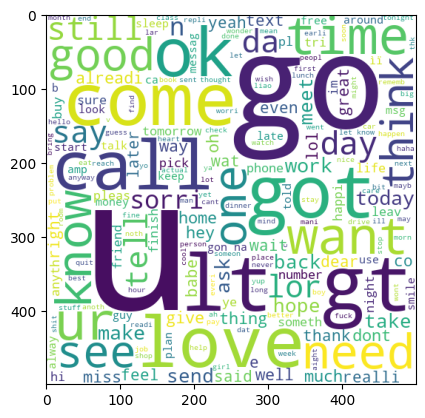

In [113]:
plt.imshow(ham_wc)

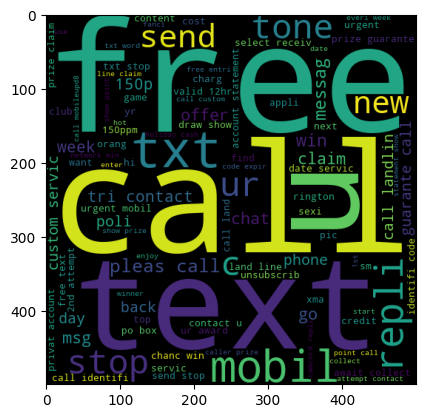

In [114]:
plt.imshow(spam_wcc)

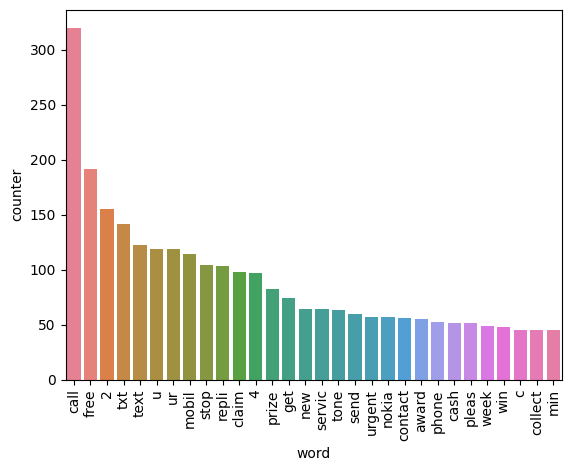

In [115]:
spam_corpus=[]
for msg in df[df['target']==1].transformed_text.tolist():
    for word in msg.split():
        spam_corpus.append(word)
spm = pd.DataFrame(Counter(spam_corpus).most_common(30))
spm.columns=['word','counter']
sns.barplot(data=spm,x='word',y='counter',hue='word')
plt.xticks(rotation='vertical')
plt.show()

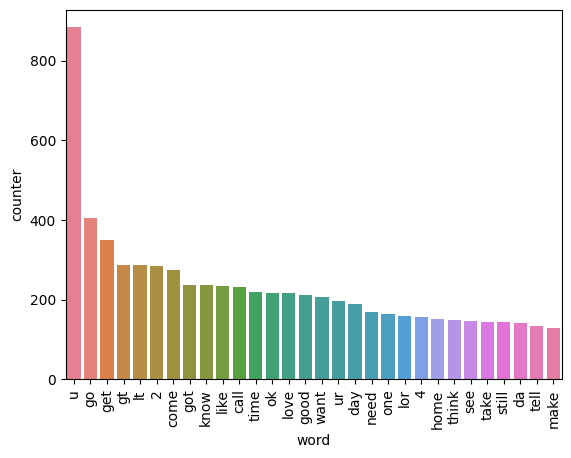

In [116]:
ham_corpus=[]
for msg in df[df['target']==0].transformed_text.tolist():
    for word in msg.split():
        ham_corpus.append(word)
hpm = pd.DataFrame(Counter(ham_corpus).most_common(30))
hpm.columns=['word','counter']
sns.barplot(data=hpm,x='word',y='counter',hue='word')
plt.xticks(rotation='vertical')
plt.show()

In [117]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [118]:
cv=CountVectorizer()

In [119]:
tfid=TfidfVectorizer(max_features=3000)
vectors=tfid.fit_transform(df.transformed_text)

<2x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [120]:
vectors=vectors.toarray()

In [121]:
vectors.shape

(5169, 3000)

In [122]:
# Model Selection
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [123]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(vectors,df.target,test_size=0.2,random_state=14)

In [126]:
mnb.fit(x_train,y_train)              
print(accuracy_score(y_test,mnb.predict(x_test)))
print(precision_score(y_test,mnb.predict(x_test)))
print(confusion_matrix(y_test,mnb.predict(x_test)))

0.9845261121856866
1.0
[[913   0]
 [ 16 105]]


In [127]:
gnb.fit(x_train,y_train)
print(accuracy_score(y_test,gnb.predict(x_test)))
print(precision_score(y_test,gnb.predict(x_test)))
print(confusion_matrix(y_test,gnb.predict(x_test)))

0.8626692456479691
0.45414847161572053
[[788 125]
 [ 17 104]]


In [128]:
bnb.fit(x_train,y_train)
print(accuracy_score(y_test,bnb.predict(x_test)))
print(precision_score(y_test,bnb.predict(x_test)))
print(confusion_matrix(y_test,bnb.predict(x_test)))

0.9845261121856866
0.972972972972973
[[910   3]
 [ 13 108]]


In [129]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [130]:
svc=SVC(kernel='sigmoid',gamma=0.1)
lr=LogisticRegression(solver='liblinear',penalty='l1')
etr=ExtraTreesClassifier(n_estimators=50,random_state=2)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
dt=DecisionTreeClassifier(max_depth=5)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bag_c=BaggingClassifier(n_estimators=50,random_state=2)
kn=KNeighborsClassifier()
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [131]:
clfs={
    'SVC':svc,
    'LR':lr,
    'KN':kn,
    'ET':etr,
    'RFC':rfc,
    'GB':gbc,
    'DT':dt,
    'Adaboost':abc,
    'Bagging':bag_c,
    'xgb':xgb
}


In [132]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    return accuracy_score(y_test,y_pred),precision_score(y_test,y_pred)

In [133]:
train_classifier(rfc,x_train,y_train,x_test,y_test)

(0.9835589941972921, 1.0)

In [134]:
a=[]
p=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)

    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)
    a.append(current_accuracy)
    p.append(current_precision)

For  SVC
Accuracy -  0.9429400386847195
Precision -  0.984375
For  LR
Accuracy -  0.9593810444874274
Precision -  0.9340659340659341
For  KN
Accuracy -  0.9303675048355899
Precision -  1.0
For  ET
Accuracy -  0.9816247582205029
Precision -  0.9636363636363636
For  RFC
Accuracy -  0.9835589941972921
Precision -  1.0
For  GB
Accuracy -  0.9622823984526112
Precision -  0.9555555555555556
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8247422680412371
For  Adaboost
Accuracy -  0.9748549323017408
Precision -  0.9279279279279279
For  Bagging
Accuracy -  0.9680851063829787
Precision -  0.8793103448275862
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9285714285714286


In [135]:
 pd.DataFrame({'Algorithm':clfs.keys(),'accuracy':a,'precision':p}).sort_values('precision',ascending=False)

,Algorithm,accuracy,precision
2,KN,0.930368,1.000000
4,RFC,0.983559,1.000000
0,SVC,0.942940,0.984375
3,ET,0.981625,0.963636
5,GB,0.962282,0.955556
1,LR,0.959381,0.934066
9,xgb,0.975822,0.928571
7,Adaboost,0.974855,0.927928
8,Bagging,0.968085,0.879310
6,DT,0.943907,0.824742


In [136]:
precision_score(y_test,rfc.predict(x_test))

1.0

In [137]:
import pickle

In [138]:
pickle.dump(tfid,open('tfid.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))